## Building the Model

I'm going to apply three classification models and then compare the outcome
* Logistic Regression
* Random Forest
* Linear SVC

In [8]:
# Import all from the 'imports.ipynb'
from ipynb.fs.full.preprocessing import *

### Logistic Regression

In [9]:
clf_logReg = LogisticRegression()

# Train the model on the training data
clf_logReg.fit(X_train, y_train)

# Predict the target values
y_pred = clf_logReg.predict(X_test)


In [10]:
y_pred.shape, y_test.shape

((114,), (114,))

In [11]:
# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  1]
 [ 2 41]]


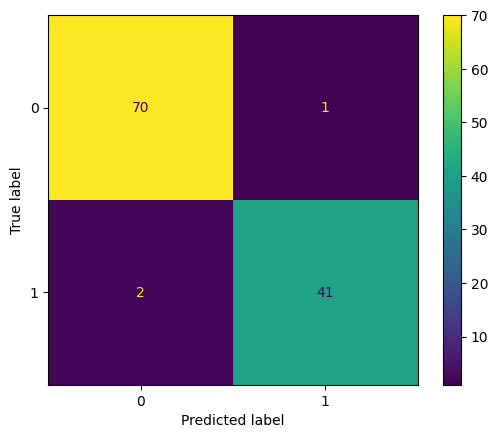

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logReg.classes_)
disp.plot()
plt.show()

In [13]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
# Cross Validation score
cv_scores = cross_val_score(clf_logReg, X_train, y_train, cv=10)
print(cv_scores)

[0.97826087 0.97826087 0.97826087 0.95652174 1.         1.
 0.97777778 0.97777778 0.95555556 0.93333333]


In [15]:
print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

Accurcacy is 97.36%
Standard deviation is 1.93


### Random Forest Classifier

In [16]:
clf_rf = RandomForestClassifier()

# Train the model on the data
clf_rf.fit(X_train, y_train)

# Predict values of y
y_pred = clf_rf.predict(X_test)

In [17]:
y_pred.shape, y_test.shape

((114,), (114,))

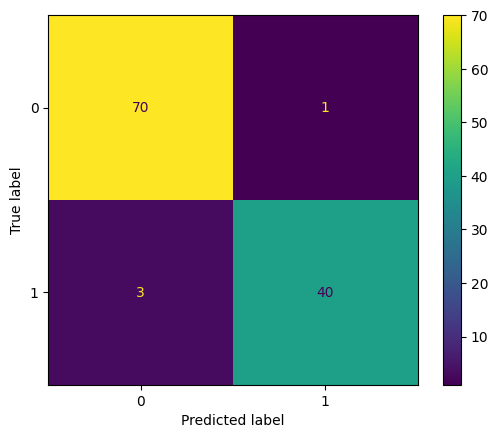

In [18]:
# Model Evaluation

# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()
plt.show()

In [19]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [20]:
# Cross Validation score
cv_scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(cv_scores)

print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

[1.         0.95652174 0.95652174 0.91304348 0.97826087 0.97777778
 0.97777778 0.95555556 0.97777778 0.93333333]
Accurcacy is 96.27%
Standard deviation is 2.40


### Support Vector Machine - Classifier

In [21]:
svc = svm.SVC()

# Train the model on the data
svc.fit(X_train, y_train)

# Predict values of y
y_pred = svc.predict(X_test)

In [22]:
y_pred.shape, y_test.shape

((114,), (114,))

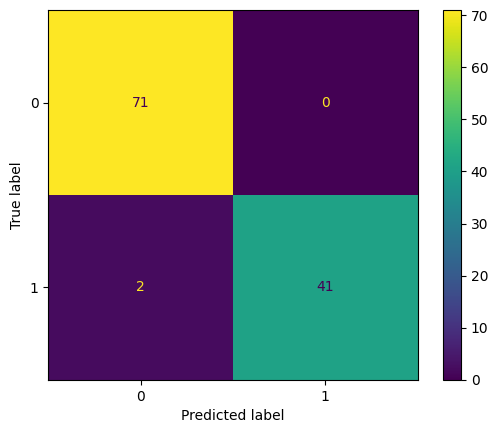

In [23]:
# Model Evaluation

# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

In [24]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 0.9726027397260274,
  'recall': 1.0,
  'f1-score': 0.9861111111111112,
  'support': 71.0},
 '1': {'precision': 1.0,
  'recall': 0.9534883720930233,
  'f1-score': 0.9761904761904762,
  'support': 43.0},
 'accuracy': 0.9824561403508771,
 'macro avg': {'precision': 0.9863013698630136,
  'recall': 0.9767441860465116,
  'f1-score': 0.9811507936507937,
  'support': 114.0},
 'weighted avg': {'precision': 0.9829367940398942,
  'recall': 0.9824561403508771,
  'f1-score': 0.9823691172375383,
  'support': 114.0}}

In [26]:
report["macro avg"]["f1-score"]

0.9811507936507937

In [27]:
# Cross Validation score
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
print(cv_scores)

print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

[0.97826087 0.97826087 0.97826087 0.95652174 0.97826087 1.
 1.         0.97777778 0.97777778 0.88888889]
Accurcacy is 97.14%
Standard deviation is 2.99


### Function for Model Training

A function will simply my work in training and evaluating the models

In [28]:
def model_func(models, cv):
    """
    Trains and evaluates multiple machine learning models,and returns a DataFrame summarizing the performance metrics of each model.

    For each model, it calculates the following metrics:
    - Accuracy (calculated using cross-validation)
    - Precision
    - Recall
    - F1 Score

    Parameters:
    models: A dictionary containing the models to be trained
    cv (int): The number of folds to use for cross-validation.

    Returns:
    pd.DataFrame: A DataFrame containing the performance metrics for each model.
                  The DataFrame has columns for the model name, accuracy, precision,
                  recall, and F1 score.
    """
    # Function implementation below

    # Instantiate the necessary Models
    svc = svm.SVC()
    clf_logReg = LogisticRegression()
    clf_rf = RandomForestClassifier()

    metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "CV Accuracy"])

    for model_name, model in models.items():
        # Train the model on training dataset
        model.fit(X_train, y_train)
    
        # Predict values of y
        y_pred = model.predict(X_test)

        # Classification Report
        report = classification_report(y_test, y_pred, output_dict=True)

        accuracy = f"{report["accuracy"]*100:.2f}%"
        precision = report["macro avg"]["precision"]
        recall = report["macro avg"]["recall"]
        f1_score = report["macro avg"]["f1-score"] 

        # Cross Validation score
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
        cv_accuracy = f"{cv_scores.mean()*100:.2f}%"

        model_metrics = pd.DataFrame([[model_name, accuracy, precision,recall, f1_score, cv_accuracy]], columns=metrics_df.columns)

        if metrics_df.empty:
            metrics_df = model_metrics
        else:
            # Append result to metrics dataframe
            metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

    return metrics_df
    

In [29]:
# Models to be trained
models = {
    "Logistic Regression": clf_logReg,
    "RandomForest Classifier": clf_rf,
    "Support Vector": svc
}

# Model Training and Evaluation
model_func(models, 10)

,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
0,Logistic Regression,97.37%,0.974206,0.969702,0.971863,97.36%
1,RandomForest Classifier,96.49%,0.967257,0.958074,0.962302,96.04%
2,Support Vector,98.25%,0.986301,0.976744,0.981151,97.14%
